# Student Performance Indicator

#### Machine Learning Project Life Cycle

* Understanding the Problem Statement
* Data Collection
* Data Checks to Perform
* Exploratory Data Analysis
* Data Pre-Processing
* Model Training
* Choose Best Model

### 1. Problem Statement

This project understands how the student's performance (test score) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2. Data Collection

* The dataset was downloaded from : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data
* The data cinsists of 8 column and 1000 rows

#### 2.1 Import Required Packages and Dataset

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Dataset as DataFrame

In [2]:
data = pd.read_csv('data/stud.csv')

Show top 5 records

In [3]:
data.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of dataset

In [4]:
data.shape

(1000, 8)

#### 2.2 Dataset Information

* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

### 3. Data Checks to Perform

* Check missing values
* Check duplicates
* Check data type
* Check the number of unique values of eachg column
* Check statistics of dataset
* Check various categories present in the different categorical column

#### 3.1 Check Missing Values

In [5]:
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset.

#### 3.2 Check Duplicates

In [6]:
data.duplicated().sum()

0

There are no duplicates in the dataset.

#### 3.3 Check Data Type

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There are two data type in our dataset, which is object and integer type.

3.4 Check the number of unique values of each column

In [8]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check statistic of dataset

In [9]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Findings:**
* From above statistic information of dataset, all mean score are very close to each other between 66 - 69;
* The standard deviation are also close between 14.60 - 15.19;
* The minimum scores are slightly different from each other: 0 for math, 10 for writing, and 17 for reading.

#### 3.6 Exploring Dataset

In [10]:
# show top 5 of dataset
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
# show unique value in categorical feature fo dataset
print("categories in `gender` feature:    ", end=" ")
print(data['gender'].unique())

print("Categories in `race_ethnicity` feature: ", end=" ")
print(data['race_ethnicity'].unique())

print("Categories in `parental_level_of_education: ", end=" ")
print(data['parental_level_of_education'].unique())

print("Categories in `lunch` variable:  ", end=" ")
print(data['lunch'].unique())

print("Categories in `test_preparation_course`: ", end=" ")
print(data['test_preparation_course'].unique())

categories in `gender` feature:     ['female' 'male']
Categories in `race_ethnicity` feature:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in `parental_level_of_education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in `lunch` variable:   ['standard' 'free/reduced']
Categories in `test_preparation_course`:  ['none' 'completed']


In [12]:
# define numerical and categorical feature
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

print('We have {} numerical feature: {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical feature: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### 3.8 Adding Columns for `Total Score` and `Average`.

In [13]:
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']
data['average'] = round(data['total_score']/3, 2)
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


Next we find out how many students that have full marks on each score and total_score.

In [14]:
# calculate students with full marks score
math_full = data[data['math_score'] == 100]['average'].count()
reading_full = data[data['reading_score'] == 100]['average'].count()
writing_full = data[data['writing_score'] == 100]['average'].count()
total_full = data[data['total_score'] == 300]['average'].count()

print(f'Number of students with full marks in Math: {math_full}')
print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'\nNumber of students with full marks in all score: {total_full}')

Number of students with full marks in Math: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14

Number of students with full marks in all score: 3


In [15]:
# calculate students with score below 30
math_less_30 = data[data['math_score'] <= 30]['average'].count()
reading_less_30 = data[data['reading_score'] <= 30]['average'].count()
writing_less_30 = data[data['writing_score'] <= 30]['average'].count()

print(f'Number of students with full marks in Math: {math_less_30}')
print(f'Number of students with full marks in Reading: {reading_less_30}')
print(f'Number of students with full marks in Writing: {writing_less_30}')

Number of students with full marks in Math: 16
Number of students with full marks in Reading: 8
Number of students with full marks in Writing: 10


**Insight:**
* From above values we find that some students have performed the worst in math and best performance is in the reading section;
* There are some students with perfect performance with full score on each section.

### 4. Exploring Data (Visualization)

#### 4.1 Visualize average score distribution to make some conclusion.

#### 4.1.1 Average Score Dsitribution by Gender

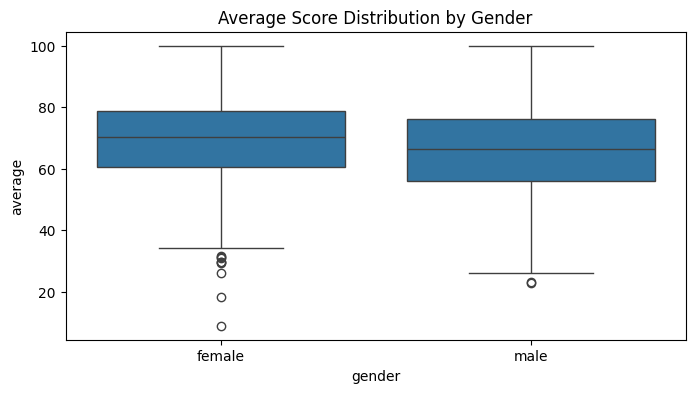

In [17]:
# Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x='gender', y='average', data=data)
plt.title('Average Score Distribution by Gender')
plt.show()

**Insight :**

Female students tend to perform slightly better than male students.

#### 4.1.2 Average Score Distribution by Race Ethnicity

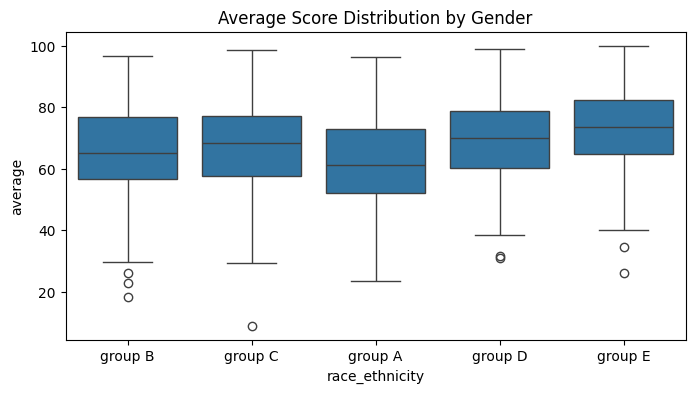

In [34]:
# Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x='race_ethnicity', y='average', data=data)
plt.title('Average Score Distribution by Gender')
plt.show()

**Insight:**

* Student of group A and group B tends to perform poorly in exams.
* Student of group E tends to perform slightly well then other group.

#### 4.1.3 Average Score Distribution by Parental Level of Education

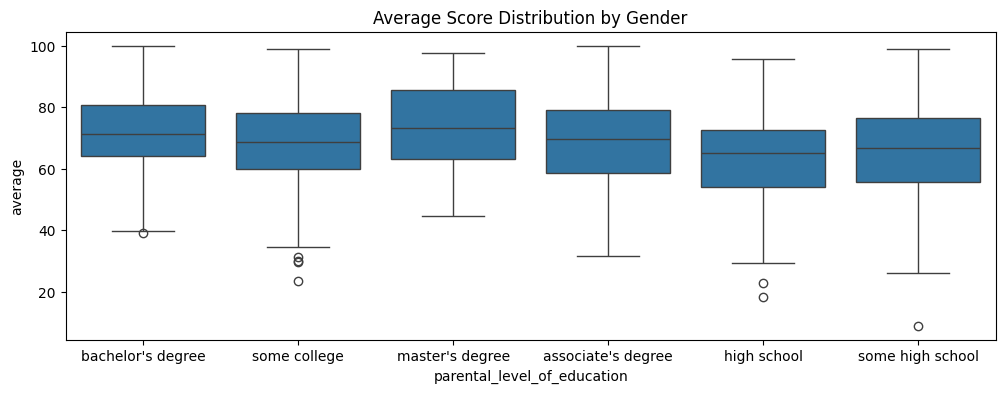

In [30]:
# Boxplot
plt.figure(figsize=(12,4))
sns.boxplot(x='parental_level_of_education', y='average', data=data)
plt.title('Average Score Distribution by Gender')
plt.show()

**Insight:**

In general, level of parent's education level don't help student perform well in exam.

#### 4.1.4 Average Score by Lunch

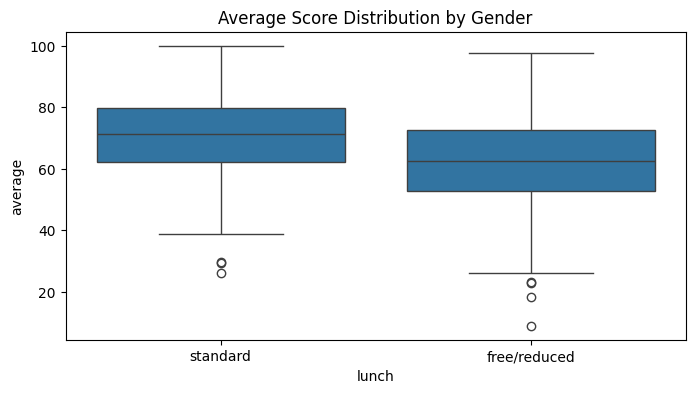

In [33]:
# Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x='lunch', y='average', data=data)
plt.title('Average Score Distribution by Gender')
plt.show()

**Insight:**

Standard lunch helps students to perform well in exams.

#### 4.1.5 Average Score by Test Preparation Course

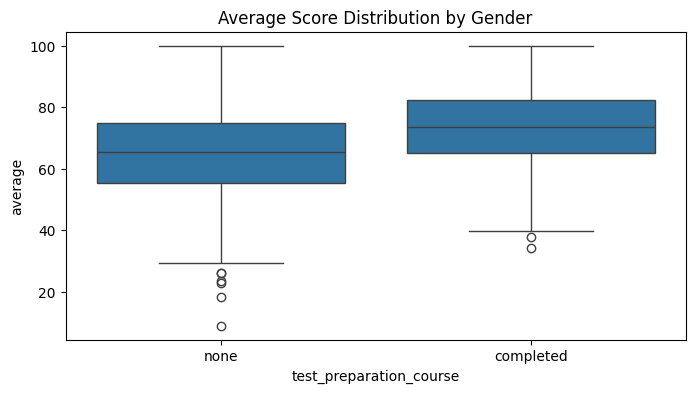

In [35]:
# Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x='test_preparation_course', y='average', data=data)
plt.title('Average Score Distribution by Gender')
plt.show()

**Insight:**

Students who completed preparation course tend to perform well in exams.

#### 4.2 Maximum Score of Students in All Subjects

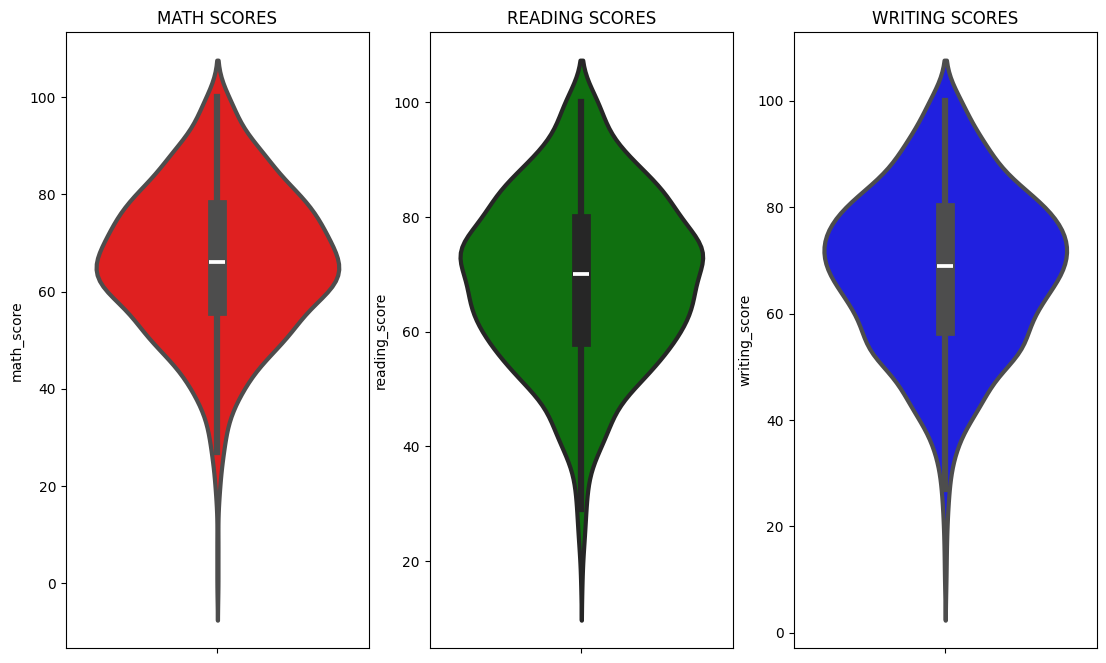

In [36]:
#Violinplot
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=data,color='blue',linewidth=3)
plt.show()

**Insight:**

From the above three plots it's clearly visible that most of students score in between 60 - 80 in Math whereas in reading and writing most of them have score from 50 - 80.

#### 4.3 Multivariate Analysis using Pieplot

In [44]:
data['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

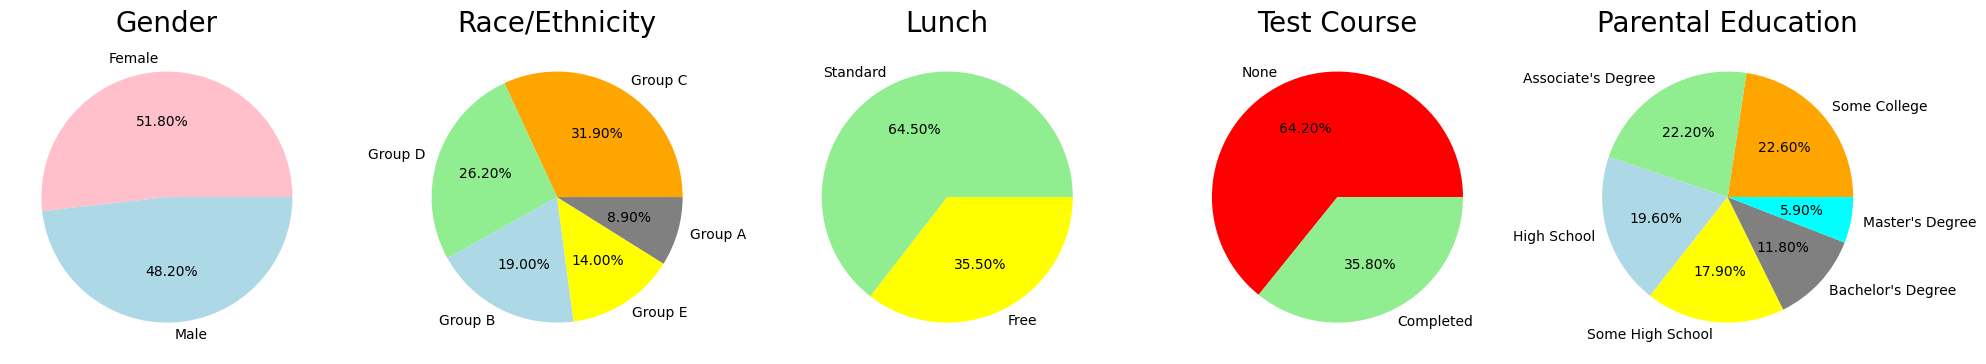

In [50]:
plt.rcParams['figure.figsize'] = (20, 12)

plt.subplot(1,5,1)
size=data['gender'].value_counts()
labels='Female', 'Male'
color = ['pink', 'lightblue']

plt.pie(size, colors = color, labels = labels,autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size=data['race_ethnicity'].value_counts()
labels='Group C', 'Group D','Group B','Group E','Group A'
color = ['orange', 'lightgreen', 'lightblue', 'yellow', 'grey']

plt.pie(size, colors = color, labels = labels,autopct = '%.2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['lightgreen','yellow']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = data['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','lightgreen']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = data['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['orange', 'lightgreen', 'lightblue', 'yellow', 'grey', 'cyan']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

**Insight:**

* Number of Female and Male students almost equal.
* Number students are greatest in race/ethnic Groupd C.
* Number of students who have standard lunch are greater.
* Number of students who have not enrolled in any preparation course in greater.
* Number of student whose parental education is `Some College` in the greatest followed closely by `Associate's Degree`.

#### 4.4 Multivariate Analysis using Pairplot

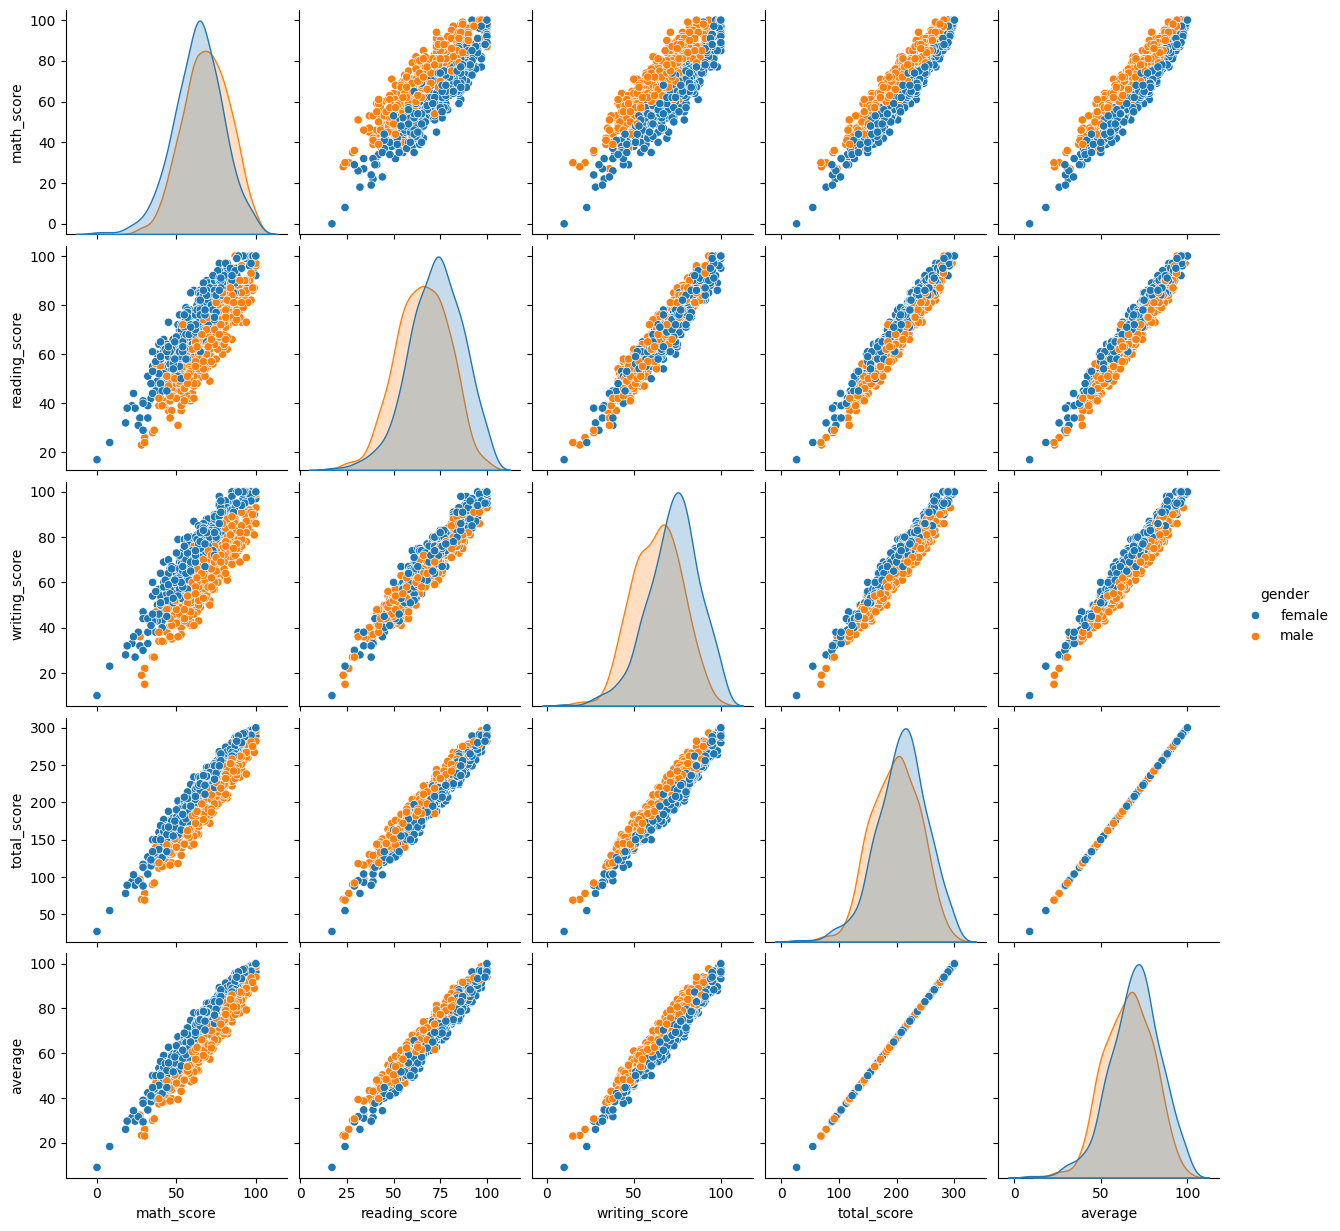

In [57]:
# pairplot score by gender
sns.pairplot(data,hue = 'gender')
plt.show()

**Insight:**

From the above plot it's clear that all the scores increase linearly with each other.

## Conclusion

* Students Performance is related with gender, lunch, race/ethnic and preparation course.
* Students Performance is not much related to parental level education.
* Finishing preparation course in beneficial to help student pass the exams.